#### Q-1 ULTRASOUND FILE

90403


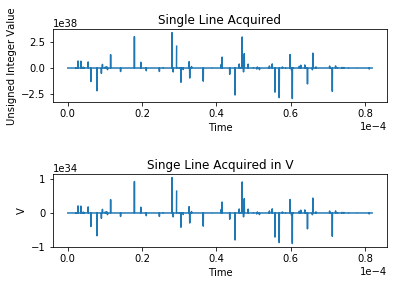

In [26]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

f = open('LabRFdata.dat','rb')   

Line = np.fromfile(f,count=-1,dtype=np.float32)
L=len(Line)
f.close() 
print(L)
x=np.arange(0,2048/25e6,1/25e6)  

plt.subplots_adjust( hspace = 1)
plt.subplot(211)
plt.plot(x,Line[:2048])
plt.title('Single Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:2048])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


#### Q-2 FREQUENCY OF ACQUIRED SIGNAL 

ValueError: x and y must have same first dimension, but have shapes (146L,) and (45201L,)

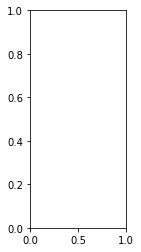

In [33]:
inx1=np.where(x>0.4103e-4)
inx1=inx1[0]
inx2=np.where(x>0.413e-4)
inx2=inx2[0]
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[0]:inx2[0]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


LineF-=np.mean(LineF)
#Now let's obtain the spectrum
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,25e6/2,25e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L

plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=len(Pyy)/2

plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

PyyM=Pyy[:L2]
mm=np.argmax(PyyM) #this gives the index where the max is found
print("The maximum is %f and it is found at index %d which is the frequency %e" % (max(PyyM),mm,f[mm]))

In [48]:
#we use a simple open command for the file (basic Python)
f = open('LabRFdata.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array


x=np.arange(0,L/20e6,1/20e6)
Lines = np.fromfile(f,count=-1,dtype=np.complex64)
Lines=Lines-np.mean(Lines)
LinesRF=Lines.reshape(128,L).copy() 
TL=len(Lines)/L
Lines=Lines-np.mean(Lines)
LinesRF=Lines.reshape(TL,L,order='F').copy()  #columns,rows

plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,LinesRF[0][:L]) #first line
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(212)
plt.plot(x,LinesRF[10][:L]) #10th line
plt.title('Tenth Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


ValueError: cannot reshape array of size 45201 into shape (128,291)

In [39]:
#Compensating
h=x*1450
ffatt=np.exp(4*4.96*h)
LineC=LineF*ffatt
#Plotting
plt.subplot(121)
plt.plot(x,LineF[:L])
plt.title('Before compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineC[:L])
plt.title('After compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ValueError: operands could not be broadcast together with shapes (90403,) (2048,) 

In [40]:
#Hilbert Transform
LineE=hilbert(LineC)
LineE=abs(LineE)
#Plotting
plt.subplot(121)
plt.plot(x,LineC[:L])
plt.title('RF signal compensated')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineE[:L])
plt.title('Envelope of the RF')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

NameError: name 'LineC' is not defined

In [41]:
#Compensating
h=x*1450
ffatt=np.exp(2*4.96*h)
LinesRFC=LinesRF*ffatt
LinesRFE=hilbert(LinesRFC)
LinesRFE=abs(LinesRFE)

Mx=LinesRFE.max()
Image=20*np.log10(LinesRFE/Mx)
ImageBW=LinesRFE

s=np.linspace(-10,10,26)

d=h/2*1000  
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, Image[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)  
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageBW[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

NameError: name 'LinesRF' is not defined

In [42]:
from scipy.signal import medfilt

#we cut anything below -50dB
cutdb=-50
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 15x15 median filter
ImageF=medfilt(Image,15)

#Plotting
d=h/2*500
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 15x15 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

NameError: name 'Image' is not defined

#### Q-3 BANDWIDTH OF THE SIGNAL 

BW = 20 log(x)
For corner frequencies, we take -3 dB and +3 dB around the corner frequencies.
If our maximum is at V=1, -3 dB should be at almost 0.707
                        +3 dB should be at almost 1.414

#### Q-5 GITHUB DICOM FILE IMPORT: US-MONO2-8-8x-execho.dcm 

In [20]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

from dicom.dataset import Dataset, FileDataset

RefDs = dicom.read_file('US-MONO2-8-8x-execho.dcm')

print(RefDs)

(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

[0, 127, 0, 119]

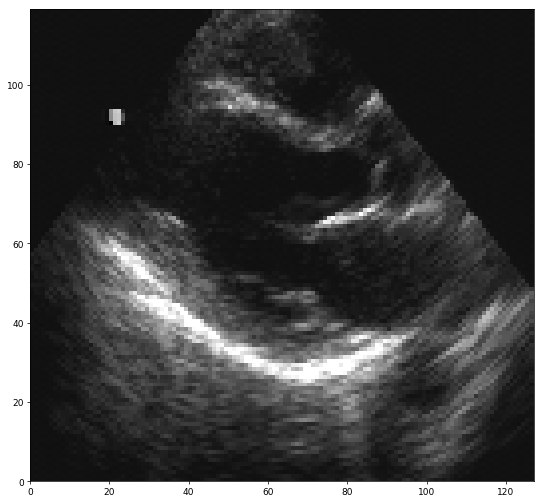

In [23]:
ConstPixelDims = (int(RefDs.NumberofFrames),int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-MONO2-8-8x-execho.dcm')
ArrayDicom[:,:,:]=ds.pixel_array # here we need to adjust the Array Space

fig=plt.figure(figsize=(10, 10), dpi= 65, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(y, x, np.flipud(ArrayDicom[1,:,:]))
plt.axis([y.min(),y.max(),x.min(),x.max()])